<a href="https://colab.research.google.com/github/AsmatZahra/FeedForward-with-faces-dataset/blob/master/Ass2_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
%cd /content/drive/My Drive/Colab Notebooks/Deep learning assignments/assignment 2/

/content/drive/My Drive/Colab Notebooks/Deep learning assignments/assignment 2


In [4]:
!ls

'Ass2 Task2.ipynb'     faces		 'Programming Assignment 2.pdf'
'Assignment 2.ipynb'  'Pokeman Dataset'


In [0]:
#from __future__ import absolute_import, division, print_function, unicode_literals

In [6]:
try:
  %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

Unknown TensorFlow version: only exists in Colab.
Currently selected TF version: 2.x
Available versions:
 * 1.x
 * 2.x


In [0]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [0]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
tf.__version__

'2.2.0-rc1'

In [0]:
#convert image form .pgm format to .jpg format for each directory i.e, train, valid, test
#once converted need not to run again
'''from glob import glob                                                           
import cv2 
import os
pgms=glob('faces/face.validation/validation/*/*.pgm')
#pgms = glob('./*.pgm')

for j in pgms:
    img = cv2.imread(j)
    cv2.imwrite(j[:-3] + 'jpg', img)'''

In [0]:
import pathlib
train_dataset_dir = "faces/face.train/train/"
train_dataset_dir = pathlib.Path(train_dataset_dir)

valid_dataset_dir = "faces/face.validation/validation/"
valid_dataset_dir = pathlib.Path(valid_dataset_dir)

test_dataset_dir = "faces/face.test/test/"
test_dataset_dir = pathlib.Path(test_dataset_dir)

In [0]:
train_image_count = len(list(train_dataset_dir.glob('*/*.jpg')))
#valid_image_count= len(list(valid_dataset_dir.glob('*/*.jpg')))
test_image_count= len(list(test_dataset_dir.glob('*/*.jpg')))
print (train_image_count)
#print(valid_image_count)
print(test_image_count)

In [14]:
CLASS_NAMES = np.array([item.name for item in train_dataset_dir.glob('*') ])
print (CLASS_NAMES)
#CLASS_NAMES = np.array([item.name for item in valid_dataset_dir.glob('*') ])
#print (CLASS_NAMES)
#CLASS_NAMES = np.array([item.name for item in test_dataset_dir.glob('*') ])
#print (CLASS_NAMES)

['non-face' 'face']


In [15]:
train_image = list(train_dataset_dir.glob('*/*.jpg'))

for train_dataset_dir in train_image [:3]:
    display.display(Image.open(str(train_dataset_dir)))

In [0]:
# just to see few test images 
'''test_image = list(test_dataset_dir.glob('*/*.jpg'))

for test_dataset_dir in test_image [:3]:
    display.display(Image.open(str(test_dataset_dir)))

In [0]:
#image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # Uncomment in-case scaling is required
image_generator = tf.keras.preprocessing.image.ImageDataGenerator()

In [19]:
train_data_gen=image_generator.flow_from_directory(directory='faces/face.train/train/',
                                                   target_size=(19,19),color_mode='grayscale',
                                                   classes=['face','non-face'],class_mode='categorical',
                                                   batch_size= 32,shuffle=True)

Found 6977 images belonging to 2 classes.


In [21]:
valid_data_gen= image_generator.flow_from_directory(directory='faces/face.validation/validation/',
                                                   target_size= (19,19),
                                                   color_mode= 'grayscale',
                                                   classes=['face','non-face'],
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   shuffle= True)

Found 2000 images belonging to 2 classes.


In [24]:
                                                   color_mode= 'grayscale',
                                                   classes=['face','non-face'],
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   shuffle= True)

Found 24056 images belonging to 2 classes.


In [0]:
 train_imgs,train_labels = train_data_gen.next()
 valid_imgs,valid_labels = valid_data_gen.next()

In [25]:
#from keras import layers
#from keras import models
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu',input_shape=(19, 19, 1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 17, 17, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
BATCH_SIZE= 32
STEPS_PER_EPOCH = np.ceil(train_image_count/BATCH_SIZE)
print (STEPS_PER_EPOCH)

219.0


In [0]:
#from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('FeedForwardFacesDataSet.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [30]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= 10,
    epochs=40,
    callbacks=callbacks,
    validation_data= valid_data_gen,
    validation_steps= STEPS_PER_EPOCH,
    shuffle= True
)


Epoch 1/40
10/10 [==============================] - ETA: 0s - loss: 0.3014 - accuracy: 0.9094 
Epoch 00001: val_loss improved from 0.52621 to 0.44074, saving model to FeedForwardFacesDataSet.h5
10/10 [==============================] - 177s 18s/step - loss: 0.3014 - accuracy: 0.9094 - val_loss: 0.4407 - val_accuracy: 0.8361 - lr: 0.0010
Epoch 2/40
10/10 [==============================] - ETA: 0s - loss: 0.1690 - accuracy: 0.9719 
Epoch 00002: val_loss improved from 0.44074 to 0.33915, saving model to FeedForwardFacesDataSet.h5
10/10 [==============================] - 207s 21s/step - loss: 0.1690 - accuracy: 0.9719 - val_loss: 0.3391 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 3/40
10/10 [==============================] - ETA: 0s - loss: 0.2103 - accuracy: 0.9375 
Epoch 00003: val_loss improved from 0.33915 to 0.29038, saving model to FeedForwardFacesDataSet.h5
10/10 [==============================] - 205s 20s/step - loss: 0.2103 - accuracy: 0.9375 - val_loss: 0.2904 - val_accuracy: 0.9008

In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


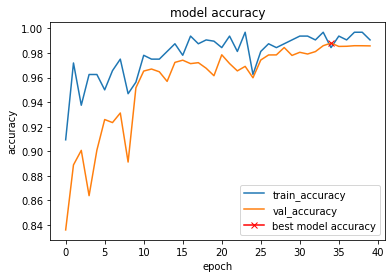

In [43]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot( np.argmax(history.history["val_accuracy"]), np.max(history.history["val_accuracy"]), marker="x", color="r", label="best model accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.legend();
#plt.show()

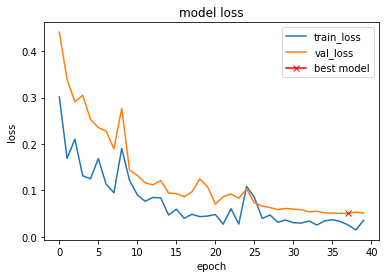

In [41]:
# summarize history for loss
plt.plot(history.history['loss'],label= "train_loss")
plt.plot(history.history['val_loss'], label= "val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend();
#plt.show()

In [0]:
test_img, test_label= test_data_gen.next()

In [45]:
print('\n# Evaluate on test data')
results_test = model.evaluate(test_img, test_label, batch_size=32)
print('test loss, test acc:', results_test)



# Evaluate on test data
1/1 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000
test loss, test acc: [0.024595797061920166, 1.0]


In [51]:
print('Generate predictions for 3 samples')
predictions = model.predict(test_img[:3])
print('Predictions are: \n', predictions)


Generate predictions for 3 samples
Predictions are: 
 [[1.1441933e-02 9.8728138e-01]
 [1.2063648e-02 9.5380521e-01]
 [1.2237486e-07 9.9999976e-01]]
